# prepare data for testing regression model

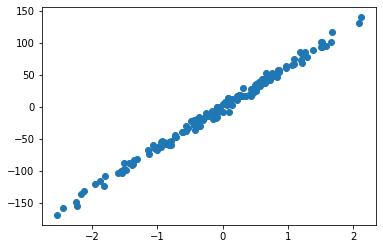

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
X_test, y_test = make_regression(n_samples=150, n_features=1, noise=6)
pyplot.scatter(X_test,y_test)
pyplot.show()

In [ ]:
import numpy as np
import torch
X_test = torch.from_numpy(X_test.astype(np.float32))
X_test.shape

torch.Size([150, 1])

In [ ]:
y_test = torch.from_numpy(y_test.reshape(150,1).astype(np.float32))
y_test.shape

torch.Size([150, 1])

# make model using pytorch

In [ ]:
import torch
import torch.nn as nn

# define linear regression  model
n_input, n_out, batch_size, learning_rate = 1, 1, 100, 0.01
model = nn.Sequential(nn.Linear(n_input, n_out ))

# define loss function and optimzer on how to upgrade the gradient
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# actual training is happening
losses = []
for epoch in range(2000):
    pred_y = model(X_test[:,:])
    loss = loss_function(y_test, pred_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()
    optimizer.step()

# check the what we get after training

In [ ]:
# weight and bias (w,b)
for name, param in model.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[64.2087]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.5252], requires_grad=True)


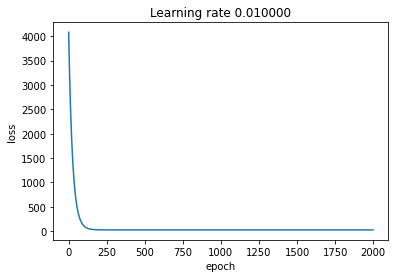

In [ ]:
# visualize the loss during each epoch
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()